<a href="https://colab.research.google.com/github/snehaangeline/Machine-Learning-algorithms/blob/main/task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from math import exp
plt.rcParams["figure.figsize"] = (10, 6)

# Load the data
data = pd.read_csv("https://raw.githubusercontent.com/nunnarilabs/ml/master/Social_Network_Ads.csv")
data.head(20)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [ ]:
data.corr()
# -1 0 +1

,User ID,Age,EstimatedSalary,Purchased
User ID,1.000000,-0.000721,0.071097,0.007120
Age,-0.000721,1.000000,0.155238,0.622454
EstimatedSalary,0.071097,0.155238,1.000000,0.362083
Purchased,0.007120,0.622454,0.362083,1.000000


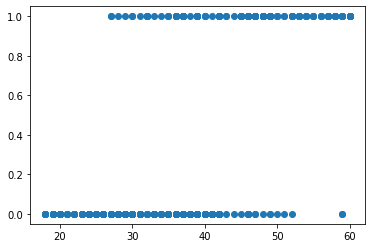

In [ ]:
# Visualizing the dataset
plt.scatter(data['Age'], data['Purchased'])
plt.show()

In [ ]:
# Age 20 - 80
# Salary 10k to 100k

# range 0 - 1

In [ ]:
def normalize(X):
    return X - X.mean()

In [ ]:
X = normalize(data['Age'])
Y = data['Purchased']

In [ ]:
## Classroom
# addition
# 2 chances - Memorize, Learn addition operation

In [ ]:
# Divide the data to training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=0)

In [ ]:
X_test

132    -7.655
309     0.345
341    -2.655
196    -7.655
246    -2.655
        ...  
14    -19.655
363     4.345
304     2.345
361    15.345
329     9.345
Name: Age, Length: 80, dtype: float64

In [ ]:
def predict(X, c, m):
  return np.array([1/ (1 + exp((-1*c) + (-1*m*x))) for x in X])

In [ ]:
print(predict(X_test, 1, 1))

In [ ]:
np.array(y_test)

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1])

In [ ]:
np.array(y_pred)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1])

In [ ]:
def logistic_regression(X, Y):

  c = 0
  m = 0
  L = 0.001
  epochs = 500

  for epoch in range(epochs):
    y_hat = predict(X, c, m)
    dE_dc = -2 * sum((Y - y_hat) * y_hat * (1 - y_hat))  # Derivative of loss wrt c
    dE_dm = -2 * sum(X * (Y - y_hat) * y_hat * (1 - y_hat))  # Derivative of loss wrt m

    c = c - (L * dE_dc)
    m = m - (L * dE_dm)

  return c, m


In [ ]:
c, m = logistic_regression(X_train, y_train)

In [ ]:
c, m

(-0.9693988075659526, 0.1875044037378038)

In [ ]:
y_pred = predict(X_test, c, m)
y_pred = [1 if p >= 0.5 else 0 for p in y_pred]

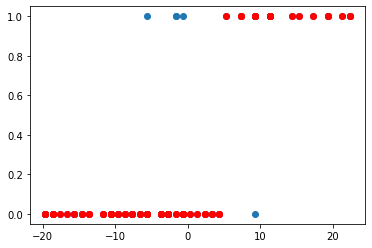

Accuracy = 0.9375


In [ ]:
plt.clf()
plt.scatter(X_test, y_test)
plt.scatter(X_test, y_pred, c="red")
# plt.plot(X_test, y_pred, c="red", linestyle='-', marker='o') # Only if values are sorted
plt.show()

# The accuracy
accuracy = 0
for i in range(len(y_pred)):
    if y_pred[i] == y_test.iloc[i]:
        accuracy += 1
print(f"Accuracy = {accuracy / len(y_pred)}")

In [ ]:
np.array(y_test)

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1])

In [ ]:
np.array(y_pred)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1])

## Sklearn Log Regression




In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr_model = LogisticRegression()

In [ ]:
# input for ur model should be always a cloumn vector
# X_train
# X_train.values.reshape(-1, 1)

In [ ]:
lr_model.fit(X_train.values.reshape(-1, 1), y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred_sk = lr_model.predict(X_test.values.reshape(-1, 1))

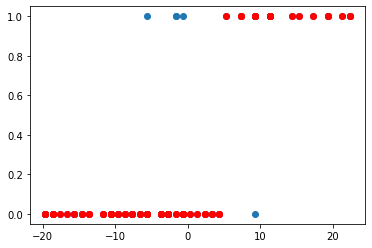

Accuracy = 0.9375


In [ ]:
plt.clf()
plt.scatter(X_test, y_test)
plt.scatter(X_test, y_pred_sk, c="red")
plt.show()

# Accuracy
print(f"Accuracy = {lr_model.score(X_test.values.reshape(-1, 1), y_test.values.reshape(-1, 1))}")

In [ ]:
lr_model.coef_

array([[0.17153926]])

In [ ]:
lr_model.intercept_

array([-0.83921666])

In [ ]:
c,m

(-0.9693988075659526, 0.1875044037378038)

In [ ]:
predict(X_test, c, m)

array([0.08281158, 0.2880836 , 0.18736507, 0.08281158, 0.18736507,
       0.04892715, 0.09821292, 0.21759813, 0.00942614, 0.68628969,
       0.08281158, 0.0584281 , 0.25120156, 0.32800867, 0.0136565 ,
       0.11611599, 0.25120156, 0.01134808, 0.90744795, 0.18736507,
       0.18736507, 0.68628969, 0.415276  , 0.68628969, 0.02372359,
       0.76093977, 0.0584281 , 0.0696389 , 0.25120156, 0.11611599,
       0.01642669, 0.25120156, 0.93449464, 0.25120156, 0.02847691,
       0.00942614, 0.01974756, 0.16047105, 0.09821292, 0.76093977,
       0.04892715, 0.415276  , 0.04892715, 0.18736507, 0.50820232,
       0.04892715, 0.25120156, 0.84817415, 0.04090403, 0.76093977,
       0.93449464, 0.16047105, 0.18736507, 0.16047105, 0.95403774,
       0.60056529, 0.0696389 , 0.04090403, 0.76093977, 0.02372359,
       0.11611599, 0.96159431, 0.01134808, 0.21759813, 0.01134808,
       0.96159431, 0.02847691, 0.04892715, 0.37058663, 0.46140389,
       0.11611599, 0.18736507, 0.01974756, 0.60056529, 0.04892

In [ ]:
predict(X_test, lr_model.intercept_, lr_model.coef_)

array([0.10411186, 0.31431221, 0.21506622, 0.10411186, 0.21506622,
       0.0649509 , 0.12123247, 0.2454341 , 0.01461735, 0.68218202,
       0.10411186, 0.0761793 , 0.27856821, 0.35240227, 0.02047742,
       0.14072624, 0.27856821, 0.01730537, 0.89436571, 0.21506622,
       0.21506622, 0.68218202, 0.43403235, 0.68218202, 0.033793  ,
       0.75155002, 0.0761793 , 0.08916372, 0.27856821, 0.14072624,
       0.02421658, 0.27856821, 0.92267147, 0.27856821, 0.03986461,
       0.01461735, 0.02861856, 0.187522  , 0.12123247, 0.75155002,
       0.0649509 , 0.43403235, 0.0649509 , 0.21506622, 0.51940541,
       0.0649509 , 0.27856821, 0.83500382, 0.05527847, 0.75155002,
       0.92267147, 0.187522  , 0.21506622, 0.187522  , 0.94386845,
       0.60366012, 0.08916372, 0.05527847, 0.75155002, 0.033793  ,
       0.14072624, 0.95229452, 0.01730537, 0.2454341 , 0.01730537,
       0.95229452, 0.03986461, 0.0649509 , 0.39246627, 0.47654757,
       0.14072624, 0.21506622, 0.02861856, 0.60366012, 0.06495

## Multivariate

In [ ]:
data.head(20)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [ ]:
data['Age_Norm'] = data.Age/data.Age.mean()
data['EstimatedSalary_Norm'] = data.EstimatedSalary/data.EstimatedSalary.mean()
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased,Age_Norm,EstimatedSalary_Norm
0,15624510,Male,19,19000,0,0.504581,0.272431
1,15810944,Male,35,20000,0,0.929491,0.286769
2,15668575,Female,26,43000,0,0.690479,0.616554
3,15603246,Female,27,57000,0,0.717036,0.817292
4,15804002,Male,19,76000,0,0.504581,1.089723


In [ ]:
lr_model = LogisticRegression()

In [ ]:
X = data[['Age_Norm', 'EstimatedSalary_Norm']]
Y = data.Purchased

In [ ]:
lr_model.fit(X, Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
lr_model.score(X, Y)

0.8275

In [ ]:
lr_model.predict([[0.849821, 2.150769]])

array([1])

In [ ]:
lr_model.predict([[0.504581, 0.272431]])

array([0])

In [ ]:
data.Age.mean()

37.655

In [ ]:
data.EstimatedSalary.mean()

69742.5

In [ ]:
lr_model.predict([[30, 20000]]) # wrong
# do prediction after normalization

array([1])

In [ ]:
lr_model.predict([[30/data.Age.mean(), 20000/data.EstimatedSalary.mean()]]) # wrong
# do prediction after normalization

array([0])

1. Import the data
2. Clean data
3. Preprocess/Transform Data
4. Modeling
5. TRaining
6. Prediction

In [ ]:
y_pred_sk = lr_model.predict(data[['Age_Norm', 'EstimatedSalary_Norm']])
y_pred_sk

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,

In [ ]:
y_true_sk = data.Purchased.to_numpy()
y_true_sk

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

In [ ]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import accuracy_score

In [ ]:
jaccard_similarity_score(y_pred_sk, y_true_sk)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


0.8275

In [ ]:
accuracy_score(y_pred_sk, y_true_sk)

0.8275

In [ ]:
accuracy_score([1,2,3, 4], [1,4,3, 2])

0.5

In [ ]:
# The accuracy
accuracy = 0
for i in range(len(y_pred_sk)):
    if y_pred_sk[i] == y_true_sk[i]:
        accuracy += 1
print(f"Accuracy = {accuracy / len(y_pred_sk)}")

Accuracy = 0.8275


## Sklearn Pipeline

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipe = Pipeline([('scaler', StandardScaler()), ('lr', LogisticRegression())])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data[['Age', 'EstimatedSalary']], data.Purchased, train_size=0.8, random_state=0)
print("Total", len(X))
print("Train size ", len(X_train))
print("Test size ", len(X_test))

NameError: ignored

In [ ]:
# The pipeline can be used as any other estimator
# and avoids leaking the test set into the train set
pipe.fit(X_train, y_train)

pipe.score(X_test, y_test)

In [ ]:
pipe.predict(data[['Age', 'EstimatedSalary']].head(50))

In [ ]:
np.array(data.Purchased.head(50))

In [ ]:
pipe.predict([[15, 4000]])

## Multiclass

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np

In [ ]:

from sklearn.pipeline import Pipeline

pipe = Pipeline([('scaler', StandardScaler()), ('lr', LogisticRegression())])

In [ ]:
from sklearn.datasets import load_iris

In [ ]:
iris = load_iris()

In [ ]:
# iris

In [ ]:
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

In [ ]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
iris_df['target'] = pd.Series(iris.target)

In [ ]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
iris_df.target.unique()

array([0, 1, 2])

In [ ]:
def flr_name(val):
  return iris.target_names[val]

In [ ]:
iris_df['target_name'] = iris_df.target.map(flr_name)

In [ ]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [ ]:
X = iris_df.drop(['target', 'target_name'], axis='columns')
y = iris.target

In [ ]:
from sklearn import preprocessing
X_scaled = preprocessing.scale(X)
X_scaled[0]

array([-0.90068117,  1.01900435, -1.34022653, -1.3154443 ])

In [ ]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
X_std[0]

array([-0.90068117,  1.01900435, -1.34022653, -1.3154443 ])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y,train_size=0.8, random_state=0)
print("Total", len(X))
print("Train size ", len(X_train))
print("Test size ", len(X_test))

Total 150
Train size  120
Test size  30


In [ ]:
pipe.fit(X_train, y_train)

pipe.score(X_test, y_test)

NameError: ignored

In [ ]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
clf.predict(X_test)

0.9583333333333334


array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

In [ ]:
clf

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
clf = LogisticRegression(multi_class='ovr')
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
clf.predict(X_test)

0.9166666666666666


array([2, 1, 0, 2, 0, 2, 0, 2, 1, 1, 1, 2, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

In [ ]:
clf = LogisticRegression(multi_class='multinomial')
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
clf.predict(X_test)

0.9583333333333334


array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

In [ ]:
clf.predict(X_test)[0:5]

array([2, 1, 0, 2, 0])

In [ ]:
clf.predict_proba(X_test)[0:5]

array([[1.04587767e-04, 2.94732014e-02, 9.70422211e-01],
       [5.41410807e-03, 9.60244690e-01, 3.43412019e-02],
       [9.96318575e-01, 3.68138368e-03, 4.13694091e-08],
       [1.88306568e-05, 7.44876441e-02, 9.25493525e-01],
       [9.77661952e-01, 2.23375671e-02, 4.80661831e-07]])

In [ ]:
new_observation = [[.5, .5, .5, .5]]
clf.predict_proba(new_observation)

array([[0.02196266, 0.68196558, 0.29607177]])

In [ ]:
y_predicted = clf.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]])

Text(69.0, 0.5, 'Truth')

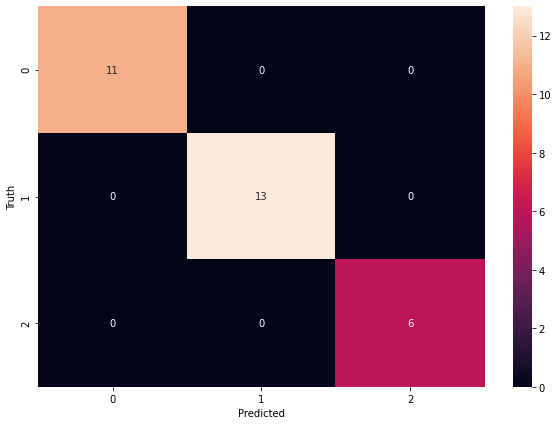

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Task : Implement iris classification using sklearn pipelin